In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={
'axes.facecolor': '#FFF9ED', 
'figure.facecolor': '#FFF9ED'
})
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date, time, timedelta


In [2]:
from matplotlib.colors import ListedColormap
colors = ['#EE1E14', '#364BA5']
custom = sns.set_palette(sns.color_palette(colors))
my_cmap = ListedColormap(sns.color_palette(colors).as_hex())
cmap = plt.cm.get_cmap('PuRd')


In [3]:
df = pd.read_excel('Data Analyst Data for Case Study .xlsx')
df.head()

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,1.0,17:55:38,NaN,NaN,1.0,17:56:35,9.0,-1.313053,36.841437,OnDemAND
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1.0,12:26:27,1.0,12:27:36,1.0,12:28:44,14.0,-1.318959,36.853394,OnDemAND
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1.0,13:21:18,1.0,13:21:34,1.0,13:47:29,16.0,-1.313854,36.706867,OnDemAND
3,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1.0,10:29:19,NaN,NaN,1.0,10:29:29,20.0,-1.206197,36.778776,OnDemAND
4,Personal,NaN,Bike,Standard,ios,No Partner,Staff,1.0,14:34:05,1.0,14:59:08,1.0,15:49:41,11.0,-1.296958,36.808166,OnDemAND


The data contains the following columns:
* **Personal or Business-** Indicates if the order was placed by an individual(Personal) or a business
* **Business Number-** The interval business number of the business that placed the order
* **Vehicle Type-** Vehicles that serviced the order
* **Standard or Express-** Type of order i.e Standard (We wait for multiple orders and then dispatch them together) or Express (just one order at a time)
* **Platform-** ios /android etc
* **Cancel Reason-** Reason why the customer cancelled the order
* **Cancelled by-** Person who cancelled the order i.e either staff or customer
* **Placement Day-** Day the order was placed i.e Monday=1
* **Placement Time-** Time the order was placed in 24 hour format
* **Confirmation Day-** Day the order was confirmed
* **Confirmation Time-** Time the order was confirmed
* **Cancellation Day-** Day the order was cancelled
* **Cancellation Time-** Time the order was cancelled in 24 hour format
* **Distance(KM)-** Distance of the order from pick up to destination
* **Pickup Lat-** Latitude of the pick up location
* **Pickup Long-** Longitude of the pick up location
* **Scheduled-** Indicates if the order was scheduled or ondemand. On-Demand orders focuses on a customer's need to receive items as quickly as possible when it's desired. Scheduled orders operate both on the customer-facing side and delivery business side, in a more planned manner

# Data Cleaning
From here, we will try to find the patterns in data as to why orders were cancelled and ways we can mitigate this

There are 6398 rows in the data


<AxesSubplot:>

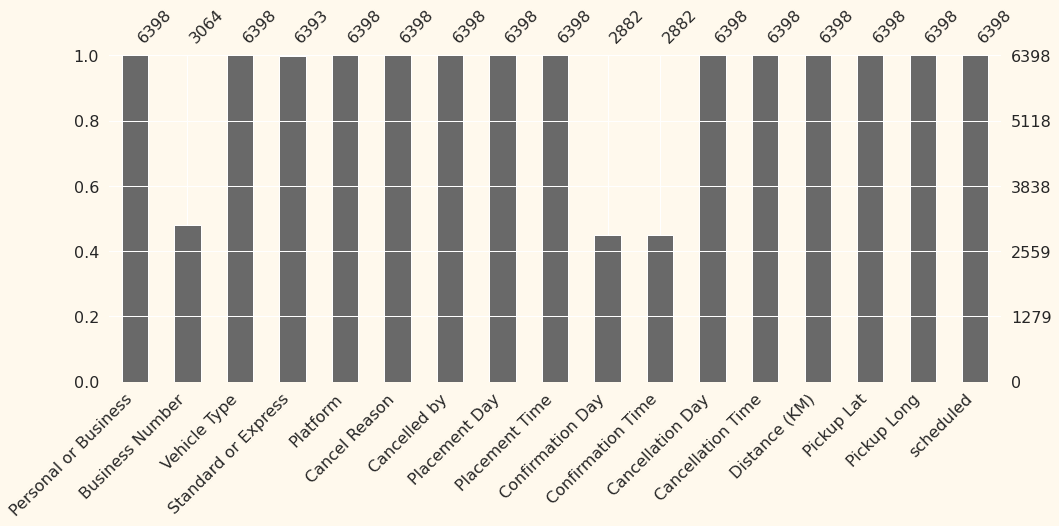

In [4]:
print(f"There are {len(df)} rows in the data")

# plot missing data
msno.bar(df,  figsize=(16,6))


We have 3 columns where we have missing data. Let us investigate the missingness of the data. There are 3 types of data missingness:
* **Missing Completely at Random(MCAR)-** When there is no relationship between the data missing and any values, and there is no particular reason for the missing values
* **Missing at Random(MAR)-** Occurs when the missingness is not random, but there is a systematic relationship between missing values and other observed data but not the missing data
* **Missing Not at Random(MNAR)-** Occurs when the missingness is not random, and there is a systematic relationship between missing value, observed value, and missing itself

## Business Number

Sendy deals with both personal and business orders. So whenever a personal order is made, the business number is then missing. So we will look at how we can deal with this problem

In [5]:
print(f"There are {df['Personal or Business'].value_counts()[1]} orders by businesses on Sendy")
print(f"There are {df['Business Number'].nunique()} unique businesses on Sendy")

There are 3064 orders by businesses on Sendy
There are 220 unique businesses on Sendy


At this point, instead of dropping the column business order, we can later on investigate which business had most it's orders cancelled and why. We can do this later, and so, I will not drop the whole column at this point

## Confirmation Day and Confirmation Time
Both these columns have the same rows with missing data, and hence, it makes sense to deal with both at the same time. On checking the missing data, I found out that when an order placement is made, and the client cancels the order before confirmation, it creates missing data in the columns we are investigating. This represents a sizeable chunk of our data, and hence we can not drop the rows, and neither drop the whole column. At this point too, we can keep the missing data until it's prudent to deal with them.

## Standard or Express

In [6]:
df[df['Standard or Express'].isnull()]

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
1272,Business,10036.0,Bike,NaN,desktop,No driver has been allocated to my request.,Customer,2.0,08:12:13,2.0,08:13:14,2.0,08:22:25,17.0,-1.297723,36.783937,OnDemAND
1870,Business,10036.0,Bike,NaN,desktop,I placed the wrong locations.,Customer,2.0,09:38:28,NaN,NaN,2.0,09:38:52,5.0,-1.299734,36.766313,OnDemAND
2806,Business,10036.0,Bike,NaN,desktop,My order is not ready.,Customer,3.0,08:02:01,3.0,08:02:30,3.0,08:08:08,4.0,-1.264832,36.787344,OnDemAND
3047,Business,10036.0,Bike,NaN,desktop,My order is not ready.,Customer,4.0,16:21:34,4.0,16:25:08,4.0,16:51:49,9.0,-1.298123,36.783337,OnDemAND
4325,Business,10036.0,Bike,NaN,desktop,No driver has been allocated to my request.,Customer,5.0,15:18:10,NaN,NaN,5.0,15:18:25,4.0,-1.289444,36.780726,OnDemAND


<AxesSubplot:>

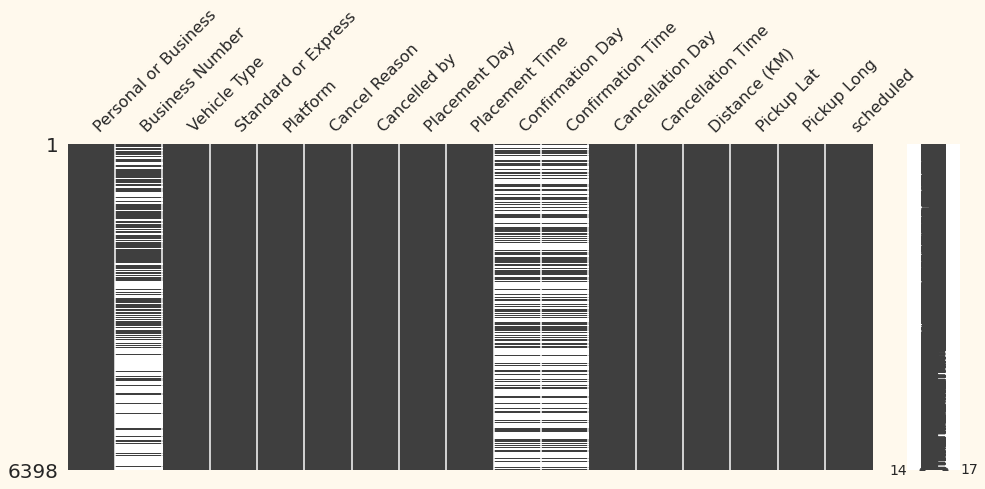

In [7]:
import missingno as msno
msno.matrix(df.sort_values(by='Standard or Express'), figsize=(16,6))

We will drop the rows where the data is missing


In [8]:
df.dropna(subset=['Standard or Express'], inplace=True)


# Exploratory Data Analysis


In [9]:
df[(df['Placement Day'] == 7) & (df['Cancellation Day'] != 1) & (df['Cancellation Day'] != 7)]

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled


In [10]:
df[(df['Cancellation Day'] - df['Placement Day']) > 2]

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
125,Personal,NaN,Bike,Standard,android,No Partner,Staff,1.0,12:20:48,1.0,14:10:02,5.0,18:35:10,5.0,-1.288939,36.797029,Scheduled
236,Business,29068.0,Bike,Standard,API,No Partner,Staff,1.0,08:28:13,1.0,15:48:23,5.0,12:47:32,21.0,-1.370628,36.798115,Scheduled
368,Personal,NaN,Bike,Standard,android,Delay,Staff,1.0,13:31:43,1.0,16:56:05,4.0,10:46:15,14.0,-1.216652,36.883553,OnDemAND
485,Personal,NaN,Bike,Express,desktop,No Partner,Staff,1.0,18:00:04,1.0,18:01:06,7.0,10:57:45,6.0,-1.289130,36.813123,OnDemAND
514,Business,20680.0,Bike,Express,desktop,No Partner,Staff,1.0,16:58:40,1.0,19:15:52,5.0,09:12:42,10.0,-1.364294,36.751826,OnDemAND
545,Business,22996.0,Bike,Express,desktop,Delay,Staff,1.0,09:53:54,1.0,09:54:45,4.0,14:31:19,6.0,-1.294910,36.777322,OnDemAND
811,Business,29068.0,Bike,Express,API,No Partner,Staff,1.0,12:18:12,6.0,11:26:33,6.0,11:51:45,26.0,-1.283729,36.817561,Scheduled
1697,Business,32692.0,Bike,Express,API,No Partner,Staff,2.0,16:40:39,2.0,17:05:57,5.0,08:41:46,0.0,-1.329790,36.872294,OnDemAND


In [11]:
df[(df['Confirmation Day'] - df['Placement Day']) > 1]

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Placement Time,Confirmation Day,Confirmation Time,Cancellation Day,Cancellation Time,Distance (KM),Pickup Lat,Pickup Long,scheduled
811,Business,29068.0,Bike,Express,API,No Partner,Staff,1.0,12:18:12,6.0,11:26:33,6.0,11:51:45,26.0,-1.283729,36.817561,Scheduled
2011,Business,29068.0,Bike,Standard,API,Customer error,Staff,3.0,15:41:41,5.0,08:26:48,5.0,11:19:17,19.0,-1.231434,36.885381,Scheduled


So we have these 2 orders that were placed, but not confirmed until after more than 1 day. From the data, the orders were scheduled. However, I cannot fully ascertain why they were confirmed so late, based on the data that is available.

In [12]:
def extract_days(col1, col2):
    if (col2 != 0) & (col1 != 0):
        if col2 > col1:
            days = col2 - col1
            return days * 24 * 60
        elif (col2 < col1) & (col2 != 0):
            days = col2 + 7 - col1
            return days * 24 * 60
        else:
            return 0
    else:
        return 0

# def convert_minutes(val):
#     t = datetime.combine(date.min, val) - datetime.min
#     min = t.total_seconds() / 60
#     return min

    

## ASSUMPTION MADE
Looking at the columns 'Placement Day', 'Confirmation Day' and 'Cancellation Day', it would have been better if the exact dates were given. This is because you cannot simply assume that for example an order placed on day 1.0 and cancelled on day 2.0, means it took 24 hours to cancel. It might have taken one week and 24 hours, two weeks and 24 hours, since every week has a monday and tuesday. However, for the sake of analysis, the assumption will be made that no order took more than 7 days after placement, to be confirmed or cancelled. This is a very crucial assumption if in the wrong, but I think it will be better for our analysis. That said, I will extract the minutes from the columns and continue with the analysis

In [14]:
for col in ['Confirmation Time', 'Confirmation Day']:
    df[col] = df[col].replace(np.nan, 0)


df['Placement Hour'] = df['Placement Time'].apply(lambda x: str(x).split(':')[0])
df['Placement Minute'] = df['Placement Time'].apply(lambda x: str(x).split(':')[1])
df['Confirmation Hour'] = df['Confirmation Time'].apply(lambda x: str(x).split(':')[0])
df['Confirmation Minute'] = df['Confirmation Time'].apply(lambda x: str(x).split(':')[1] if \
                            x != 0 else 0)
df['Cancellation Hour'] = df['Cancellation Time'].apply(lambda x: str(x).split(':')[0])
df['Cancellation Minute'] = df['Cancellation Time'].apply(lambda x: str(x).split(':')[1])
df['Confirmation Day'] = df['Confirmation Day'].replace(np.nan, 0)

cols = ['Placement Hour', 'Placement Minute',  'Confirmation Hour', 'Confirmation Minute', 'Cancellation Hour', 'Cancellation Minute']
for col in cols:
    df[col] = df[col].astype('int')

df['Placement Confirmation Minutes'] = (df['Confirmation Hour'] - df['Placement Hour'])* 60 +\
                            df['Confirmation Minute'] - df['Placement Minute'] +\
                            df.apply(lambda x: extract_days(x['Placement Day'], x['Confirmation Day']), axis=1)
 
df['Confirmation Cancellation Minutes'] = (df['Cancellation Hour'] - df['Confirmation Hour'])* 60 +\
                            df['Cancellation Minute'] - df['Confirmation Minute'] +\
                            df.apply(lambda x: extract_days(x['Confirmation Day'], x['Cancellation Day']), axis=1)
 
df['Placement Cancellation Minutes'] =  (df['Cancellation Hour'] - df['Placement Hour'])* 60 +\
                            df['Cancellation Minute'] - df['Placement Minute'] +\
                            df.apply(lambda x: extract_days(x['Placement Day'], x['Cancellation Day']), axis=1)


df['Placement Confirmation Minutes'] = df.apply(lambda x: x['Placement Confirmation Minutes'] if \
    x['Confirmation Minute'] != 0 else x['Confirmation Cancellation Minutes'], axis=1)

df['Confirmation Cancellation Minutes'] = df.apply(lambda x: x['Confirmation Cancellation Minutes'] if \
    x['Confirmation Minute'] != 0 else 0, axis=1)  


# Drop irrelevant columns
df.drop(columns=['Placement Minute','Confirmation Minute', 'Cancellation Minute',
                'Placement Time', 'Confirmation Time', 'Cancellation Time']
                , inplace=True, axis=1)       

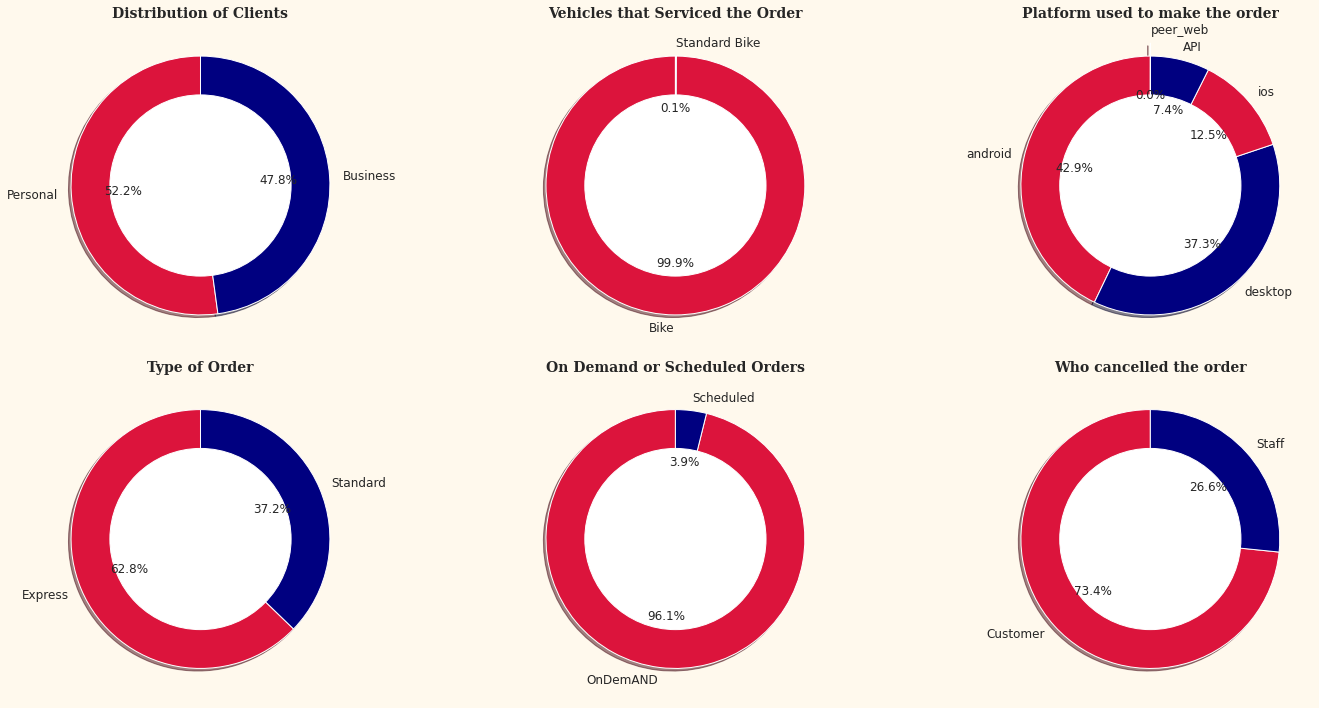

In [15]:
def donut_plot(df, col, title=None, ax=None, color=['crimson','navy'], labels = None, explode =None):
    data = df[col].value_counts()
    if labels is None:
        labels = data.index
    ax.pie(data, colors=color, autopct='%1.1f%%', shadow=True,
             startangle=90, labels=labels, textprops={'fontsize': 12},explode=explode)
    circle = plt.Circle((0,0), 0.7, color='white')
    ax.add_artist(circle)

    ax.set_title(title, fontsize=14, fontweight='bold', fontfamily='serif')
    plt.tight_layout()

fig, axs = plt.subplots(2, 3, figsize=(24,10))

donut_plot(df, 'Personal or Business', title='Distribution of Clients', ax=axs[0,0])
donut_plot(df, 'Vehicle Type', title='Vehicles that Serviced the Order', ax=axs[0,1])
donut_plot(df, 'Standard or Express', title='Type of Order', ax=axs[1,0])
donut_plot(df, 'scheduled', title='On Demand or Scheduled Orders', ax=axs[1,1])
donut_plot(df, 'Platform', title='Platform used to make the order', ax=axs[0,2], 
                explode=[0,0,0,0,0.1])
donut_plot(df, 'Cancelled by', title='Who cancelled the order', ax=axs[1,2])

**Key Takeaways**<br>
* The clients on Sendy are almost balanced in that Business orders are 47.8% and personal orders are 52.2%
* Almost all of the delivery on Sendy is done by Bike, while 0.1% is done by a Standard Bike
* Most of the orders are done by android at 42.9%, 37.3% by desktop. The smallest percentage of orders are made through peer web.
* Most of the orders are express at 62.8% while standard orders are at 37.2%
* Most of the orders at Sendy are on demand, while only a small percentage of 3.9% are usually scheduled
* Most of the orders were cancelled by the customers compared with those cancelled by staff at 26.6%

## Analysis of the Businesses prone to cancellation

In [16]:
df.head()

,Personal or Business,Business Number,Vehicle Type,Standard or Express,Platform,Cancel Reason,Cancelled by,Placement Day,Confirmation Day,Cancellation Day,Distance (KM),Pickup Lat,Pickup Long,scheduled,Placement Hour,Confirmation Hour,Cancellation Hour,Placement Confirmation Minutes,Confirmation Cancellation Minutes,Placement Cancellation Minutes
0,Personal,NaN,Bike,Express,android,No driver has been allocated to my request.,Customer,1.0,0.0,1.0,9.0,-1.313053,36.841437,OnDemAND,17,0,17,1076.0,0.0,1.0
1,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1.0,1.0,1.0,14.0,-1.318959,36.853394,OnDemAND,12,12,12,1.0,1.0,2.0
2,Business,20680.0,Bike,Express,android,I placed the wrong locations.,Customer,1.0,1.0,1.0,16.0,-1.313854,36.706867,OnDemAND,13,13,13,0.0,26.0,26.0
3,Personal,NaN,Bike,Express,android,My order is not ready.,Customer,1.0,0.0,1.0,20.0,-1.206197,36.778776,OnDemAND,10,0,10,629.0,0.0,0.0
4,Personal,NaN,Bike,Standard,ios,No Partner,Staff,1.0,1.0,1.0,11.0,-1.296958,36.808166,OnDemAND,14,14,15,25.0,50.0,75.0


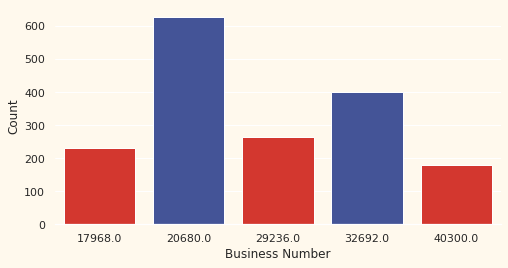

In [17]:
personal_clients = df[df['Personal or Business'] == 'Personal']
business_clients = df[df['Personal or Business'] == 'Business']

businesses = business_clients\
                        .groupby('Business Number', as_index=False)\
                        .agg({'Cancelled by': 'count'})\
                        .rename(columns = {'Cancelled by': 'Count'})\
                        .sort_values(ascending=False, by='Count').head()


fig, ax = plt.subplots(1,1, figsize=(8,4))
sns.barplot(y= 'Count', x='Business Number', data=businesses, palette=colors)

# remove borders
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)


Business number 20680 had 627 order cancellations. Let's have a look at what their reasons are

In [18]:
df[df['Business Number'] == 20680]['Cancel Reason'].value_counts()

I placed the wrong locations.                  162
No Partner                                     145
My order is not ready.                         136
No driver has been allocated to my request.    119
Customer error                                  33
The driver is too far away.                     28
Delay                                            4
Name: Cancel Reason, dtype: int64

## Analysis of Personal or Business Orders
We will answer the following questions regarding business/ personal orders:
* Is there any significant difference between the type of orders that businesses used compared to personal clients 
* Is there a significant difference between the type of platform that businesses used compared to personal clients 
* What reasons were there for the cancellation of orders in businesses compared to personal clients
* Is there a day/time you can say with confidence, businesses/personal orders were placed
* Is there a significant difference between the average distance orders were placed 
* Is there a significant difference between the schedules used by businesses compared to personal clients

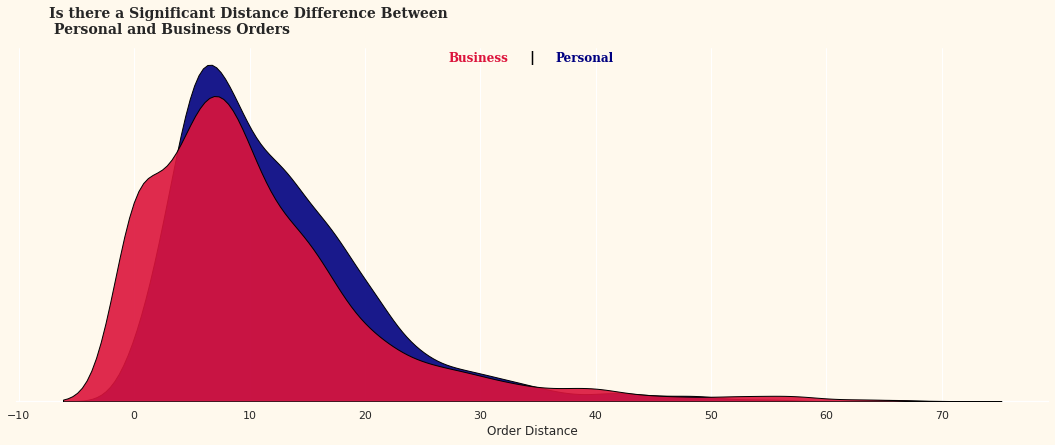

In [19]:
fig, axs = plt.subplots(1,1, figsize=(10,6))
axs.tick_params(axis='y', left=False)
axs.get_yaxis().set_visible(False)
for s in ['top', 'right', 'left']:
    axs.spines[s].set_visible(False)

# I will filter for distances < 70 purely for visualization purposes
sns.kdeplot(business_clients.where(df['Distance (KM)'] < 70)['Distance (KM)'], ax = axs, color='crimson', shade=True, linewidth=1,
                ec='black', alpha=0.9, zorder=3, legend=False)
sns.kdeplot(personal_clients.where(df['Distance (KM)'] < 70)['Distance (KM)'], ax = axs, color='navy', shade=True, linewidth=1,
                ec='black', alpha=0.9, zorder=2, legend=False)

axs.set_xlabel('Order Distance')

fig.text(0.15, 0.91, 'Is there a Significant Distance Difference Between \n Personal and Business Orders',
            fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(0.45, 0.85, 'Business', fontweight='bold', fontsize=12, color='crimson', fontfamily='serif')
fig.text(0.51, 0.85, '|', fontweight='bold', fontsize=14, color='black')
fig.text(0.53, 0.85, 'Personal', fontweight='bold', fontsize=12, color='navy', fontfamily='serif')
fig = plt.gcf()
fig.set_size_inches(18.5, 6.5)



We can see that there is no significant difference between the distance of businesses orders and personal orders

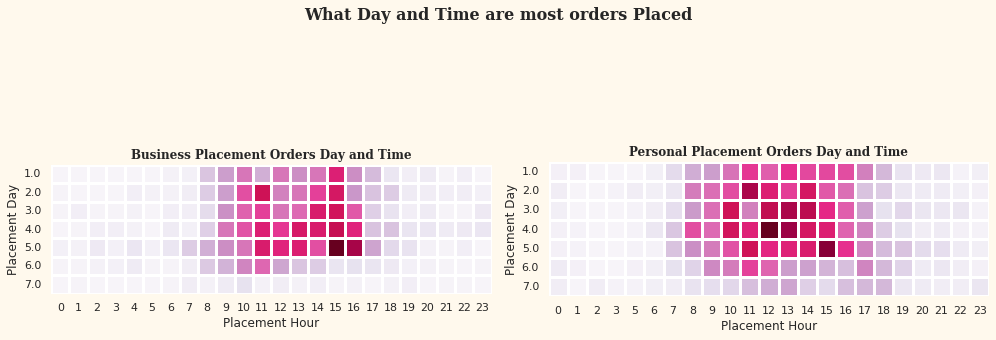

In [20]:
# business orders heatmap
business_heatmap = pd.crosstab(
    business_clients['Placement Hour'],
    business_clients['Placement Day']
).T
# personal orders heatmap
personal_heatmap = pd.crosstab(
    personal_clients['Placement Hour'],
    personal_clients['Placement Day']
).T


fig, (axs1, axs2) = plt.subplots(1,2, figsize=(14,6))

# heatmaps
sns.heatmap(business_heatmap, square=True, linewidth=2.5, cbar=False, cmap=cmap,
           ax = axs1).set_title('Business Placement Orders Day and Time', fontsize=12,fontfamily='serif', fontweight='bold')
sns.heatmap(personal_heatmap, square=True, linewidth=2.5, cbar=False, cmap=cmap,
          ax = axs2).set_title('Personal Placement Orders Day and Time', fontsize=12, fontfamily='serif', fontweight='bold')
# ax.spines['top'].set_visible=False
plt.suptitle( 'What Day and Time are most orders Placed', fontweight='bold', fontfamily='serif',
            fontsize=16)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 14.5)
plt.tight_layout()


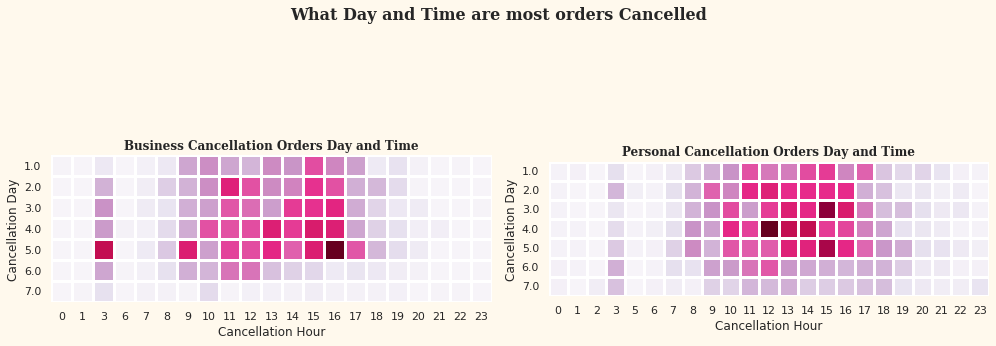

In [21]:
# business orders heatmap
business_heatmap = pd.crosstab(
    business_clients['Cancellation Hour'],
    business_clients['Cancellation Day']
).T
# personal orders heatmap
personal_heatmap = pd.crosstab(
    personal_clients['Cancellation Hour'],
    personal_clients['Cancellation Day']
).T


fig, (axs1, axs2) = plt.subplots(1,2, figsize=(14,6))

# heatmaps
sns.heatmap(business_heatmap, square=True, linewidth=2.5, cbar=False, cmap=cmap,
           ax = axs1).set_title('Business Cancellation Orders Day and Time', fontsize=12,fontfamily='serif', fontweight='bold')
sns.heatmap(personal_heatmap, square=True, linewidth=2.5, cbar=False, cmap=cmap,
          ax = axs2).set_title('Personal Cancellation Orders Day and Time', fontsize=12, fontfamily='serif', fontweight='bold')
ax.spines['top'].set_visible=False
plt.suptitle( 'What Day and Time are most orders Cancelled', fontweight='bold', fontfamily='serif',
            fontsize=16)
# fig = plt.gcf()
# fig.set_size_inches(18.5, 14.5)
plt.tight_layout()


Text(0.5, 0.98, 'Which Platforms Do Clients use to Place Orders')

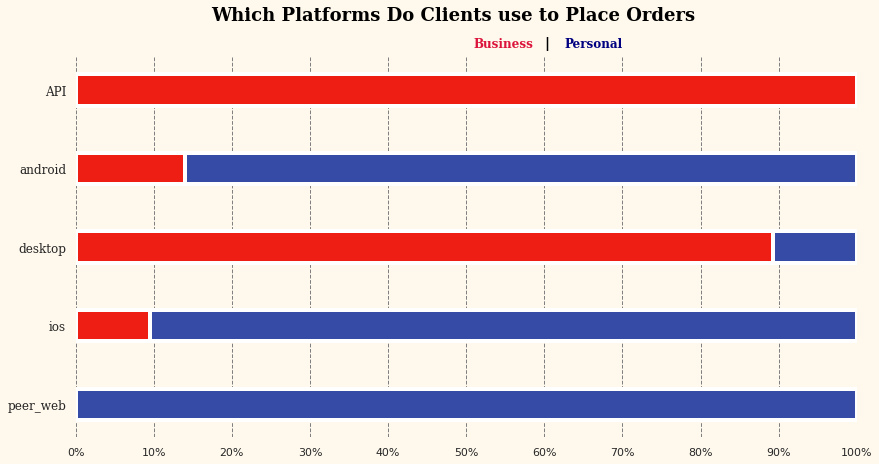

In [22]:
cross_tab = pd.crosstab(
    columns=df['Personal or Business'],
    index = df['Platform'],
    normalize='index'
).sort_index(ascending=False)

labels = df['Personal or Business'].tolist()
title = 'Which Platforms Do Clients use to Place Orders'
fields = cross_tab.columns.tolist()


fig, ax = plt.subplots(1,1, figsize=(14,7))

# plot the bars
left = len(cross_tab) * [0]

for idx, name in enumerate(fields):
    plt.barh(
        cross_tab.index,
        cross_tab[name],
        left=left,
        height=0.4,
        linewidth=4,
        align='center',
        color=colors[idx]
        )
    left = left + cross_tab[name]


ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(cross_tab.index, fontfamily='serif', fontsize=12)

# Remove spines
for i in ['right','left', 'top', 'bottom']:
    ax.spines[i].set_visible(False)

# format x ticks
xticks = np.arange(0,1.1, 0.1)
xlabels = ["{}%".format(i) for i in np.arange(0,101,10)]
plt.xticks(xticks, xlabels)
ax.xaxis.grid(color='gray', linestyle='dashed')

fig.text(0.52, 0.90, 'Business', fontweight='bold', fontsize=12, color='crimson', fontfamily='serif')
fig.text(0.59, 0.90, '|', fontweight='bold', fontsize=14, color='black')
fig.text(0.61, 0.90, 'Personal',fontweight='bold', fontsize=12, color='navy', fontfamily='serif' )
plt.suptitle(title, fontweight='bold', fontsize=18, color='black', fontfamily='serif')


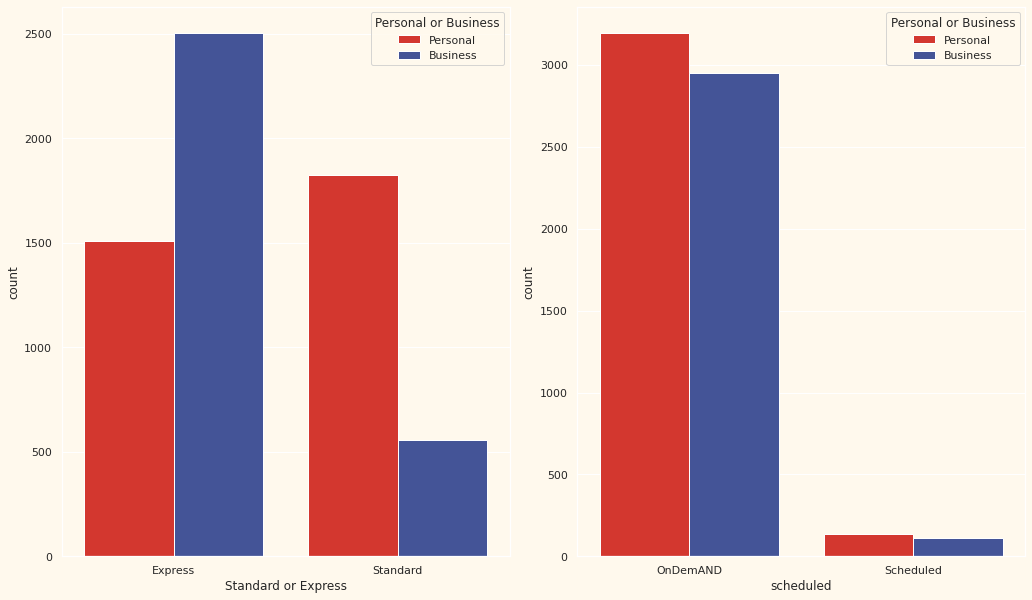

In [23]:
fig, (axs1, axs2) = plt.subplots(1,2)

sns.countplot(
    x='Standard or Express',
    hue='Personal or Business',
    data=df, 
    ax= axs1,
    palette=colors
)
sns.countplot(
    x='scheduled',
    hue='Personal or Business',
    data=df, 
    ax= axs2,
    palette=colors
)


fig = plt.gcf()
fig.set_size_inches(14.5, 8.5)
plt.tight_layout()

## Analysis of the time taken

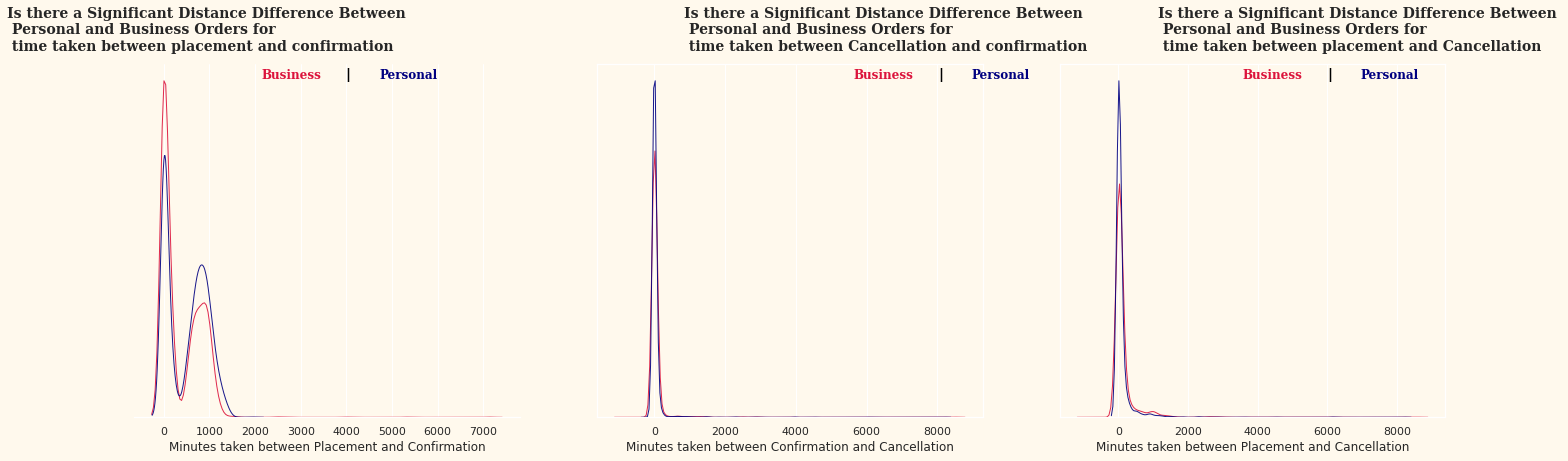

In [41]:
fig, axs = plt.subplots(1,3, figsize=(10,6))
axs[0].tick_params(axis='y', left=False)
axs[1].tick_params(axis='y', left=False)
axs[2].tick_params(axis='y', left=False)
axs[0].get_yaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
axs[2].get_yaxis().set_visible(False)

for s in ['top', 'right', 'left']:
    axs[0].spines[s].set_visible(False)

# Time taken between placement and confirmation
sns.kdeplot(business_clients['Placement Confirmation Minutes'], ax = axs[0], color='crimson',
                alpha=0.9, zorder=2, legend=False, shade=False, linewidth=1)
sns.kdeplot(personal_clients['Placement Confirmation Minutes'], ax = axs[0], color='navy',
                 alpha=0.9, zorder=3, legend=False, shade=False, linewidth=1)

# Time taken between confirmation and cancellation
sns.kdeplot(business_clients['Confirmation Cancellation Minutes'], ax = axs[1], color='crimson',
                alpha=0.9, zorder=3, legend=False, shade=False, linewidth=1)
sns.kdeplot(personal_clients['Confirmation Cancellation Minutes'], ax = axs[1], color='navy',
                 alpha=0.9, zorder=3, legend=False, shade=False, linewidth=1)

# Time taken between placement and confirmation
sns.kdeplot(business_clients['Placement Cancellation Minutes'], ax = axs[2], color='crimson',
                alpha=0.9, zorder=3, legend=False, shade=False, linewidth=1)
sns.kdeplot(personal_clients['Placement Cancellation Minutes'], ax = axs[2], color='navy',
                 alpha=0.9, zorder=3, legend=False, shade=False, linewidth=1)
    

axs[0].set_xlabel('Minutes taken between Placement and Confirmation')
axs[1].set_xlabel('Minutes taken between Confirmation and Cancellation')
axs[2].set_xlabel('Minutes taken between Placement and Cancellation')

fig.text(0.05, 0.91, 'Is there a Significant Distance Difference Between \n Personal and Business Orders for \n time taken between placement and confirmation',
            fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(0.20, 0.85, 'Business', fontweight='bold', fontsize=12, color='crimson', fontfamily='serif')
fig.text(0.25, 0.85, '|', fontweight='bold', fontsize=14, color='black')
fig.text(0.27, 0.85, 'Personal', fontweight='bold', fontsize=12, color='navy', fontfamily='serif')

fig.text(0.45, 0.91, 'Is there a Significant Distance Difference Between \n Personal and Business Orders for \n time taken between Cancellation and confirmation',
            fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(0.55, 0.85, 'Business', fontweight='bold', fontsize=12, color='crimson', fontfamily='serif')
fig.text(0.60, 0.85, '|', fontweight='bold', fontsize=14, color='black')
fig.text(0.62, 0.85, 'Personal', fontweight='bold', fontsize=12, color='navy', fontfamily='serif')

fig.text(0.73, 0.91, 'Is there a Significant Distance Difference Between \n Personal and Business Orders for \n time taken between placement and Cancellation',
            fontsize=14, fontweight='bold', fontfamily='serif')
fig.text(0.78, 0.85, 'Business', fontweight='bold', fontsize=12, color='crimson', fontfamily='serif')
fig.text(0.83, 0.85, '|', fontweight='bold', fontsize=14, color='black')
fig.text(0.85, 0.85, 'Personal', fontweight='bold', fontsize=12, color='navy', fontfamily='serif')

fig = plt.gcf()
fig.set_size_inches(23.5, 6.5)



## Analysis of the Cancel Reasons and Time

In [42]:
df['Cancel Reason'].value_counts()

No driver has been allocated to my request.    1773
No Partner                                     1293
My order is not ready.                         1212
I placed the wrong locations.                  1113
The driver is too far away.                     594
Customer error                                  337
Delay                                            71
Name: Cancel Reason, dtype: int64

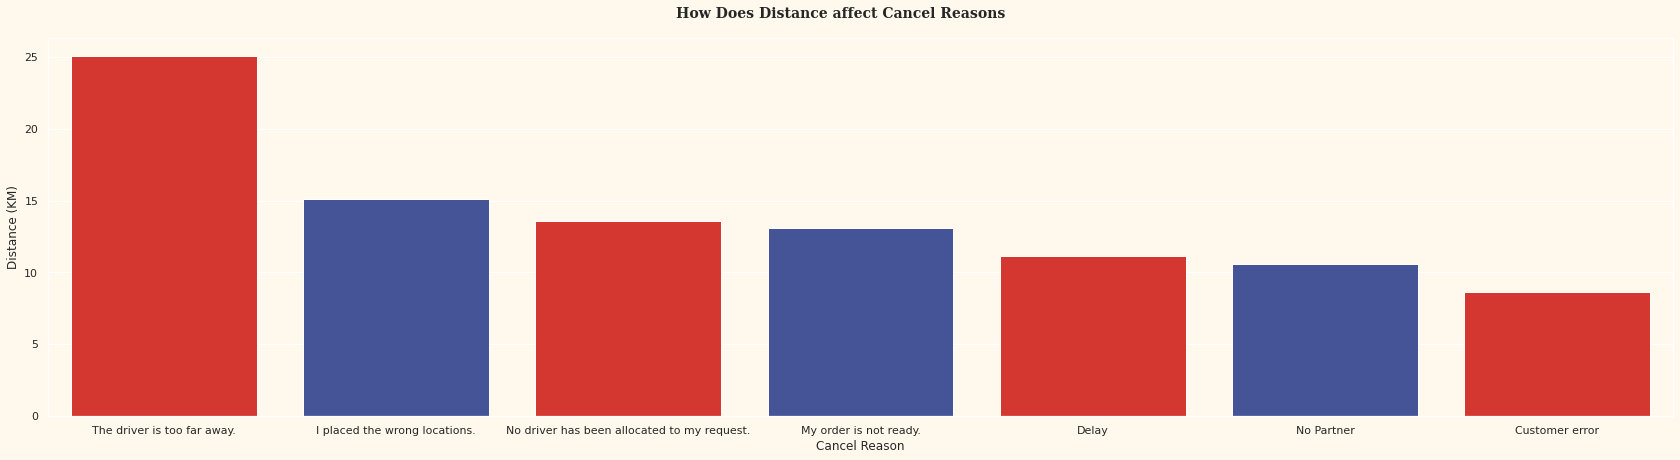

In [71]:
df_cancel_reason = df.groupby('Cancel Reason', as_index=False).agg({
    'Distance (KM)': 'mean',
    'Placement Confirmation Minutes': 'mean',
    'Confirmation Cancellation Minutes': 'mean',
    'Placement Cancellation Minutes': 'mean'
})

fig, axs = plt.subplots(1,1)
sns.barplot(x='Cancel Reason', y='Distance (KM)', data=df_cancel_reason.sort_values(by='Distance (KM)', ascending=False), palette=colors)
fig = plt.gcf()
fig.set_size_inches(23.5, 6.5)
plt.suptitle('How Does Distance affect Cancel Reasons', fontfamily='serif', fontweight='bold', fontsize=14)
plt.tight_layout()

Let us analyze time taken and the cancel reasons by customers

In [81]:
df1 = df[df['Cancelled by'] == 'Customer']
customer_cancel_reasons = df1.groupby('Cancel Reason', as_index=False).agg({
    'Distance (KM)': 'mean',
    'Placement Confirmation Minutes': 'mean',
    'Confirmation Cancellation Minutes': 'mean',
    'Placement Cancellation Minutes': 'mean'
})
customer_cancel_reasons

,Cancel Reason,Distance (KM),Placement Confirmation Minutes,Confirmation Cancellation Minutes,Placement Cancellation Minutes
0,I placed the wrong locations.,15.122192,468.085355,13.115903,26.013477
1,My order is not ready.,13.099010,406.204620,11.716172,25.542079
2,No driver has been allocated to my request.,13.598421,677.056402,11.492950,48.513254
3,The driver is too far away.,25.069024,311.447811,26.282828,49.346801


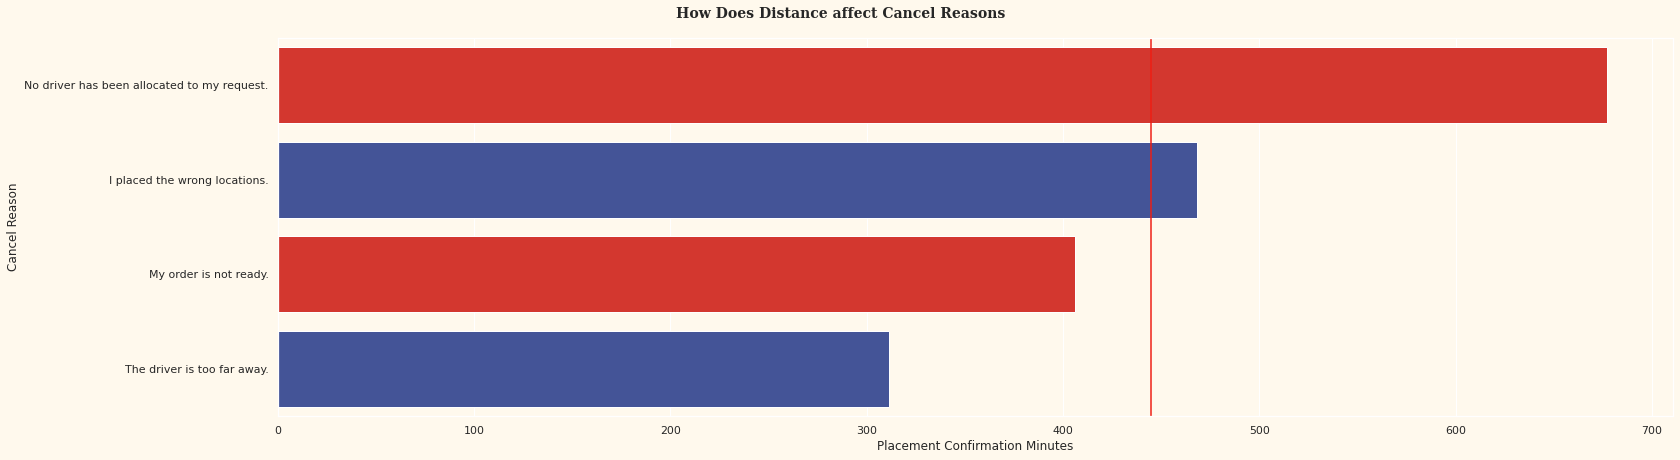

In [86]:
fig, axs = plt.subplots(1,1)
sns.barplot(
    y='Cancel Reason', 
    x='Placement Confirmation Minutes', 
    data=customer_cancel_reasons.sort_values(by='Placement Confirmation Minutes', ascending=False), 
    palette=colors)

plt.axvline(df['Placement Confirmation Minutes'].mean())

fig = plt.gcf()
fig.set_size_inches(23.5, 6.5)
plt.suptitle('How Does Distance affect Cancel Reasons', fontfamily='serif', fontweight='bold', fontsize=14)
plt.tight_layout()

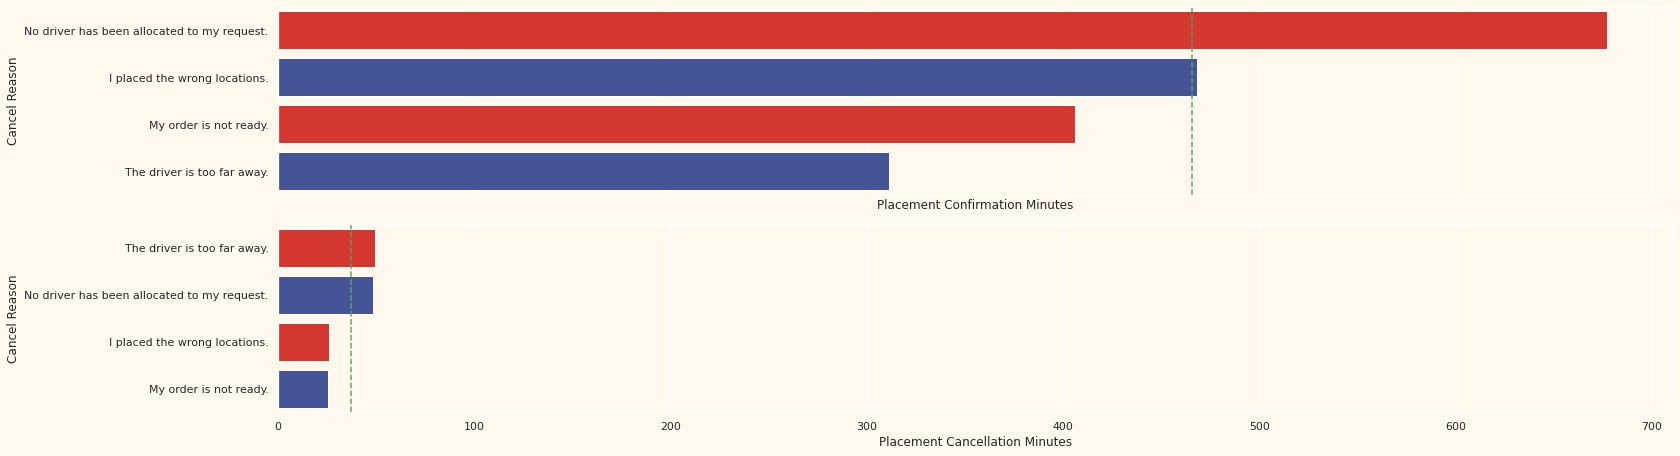

In [104]:
fig, axs = plt.subplots(2,1, sharex = True)
sns.barplot(
    y='Cancel Reason', 
    x='Placement Confirmation Minutes', 
    data=customer_cancel_reasons.sort_values(by='Placement Confirmation Minutes', ascending=False), 
    ax = axs[0],
    palette=colors)

axs[0].axvline(customer_cancel_reasons['Placement Confirmation Minutes'].mean(), color = 'g', linestyle='--')

sns.barplot(
    y='Cancel Reason', 
    x='Placement Cancellation Minutes', 
    data=customer_cancel_reasons.sort_values(by='Placement Cancellation Minutes', ascending=False), 
    ax = axs[1],
    palette=colors)

plt.axvline(customer_cancel_reasons['Placement Cancellation Minutes'].mean(), color = 'g', linestyle='--')

fig = plt.gcf()
fig.set_size_inches(23.5, 6.5)
# plt.suptitle('How Does Distance affect Cancel Reasons', fontfamily='serif', fontweight='bold', fontsize=14)
plt.tight_layout()

The highest proportion of people cancelled their orders because no driver had been allocated to their requests. Let us analyze how long they had to wait.

How long on average did they have to wait

* How does time affect cancellation - check time against customer cancellation
* Relationship btw standard/exprss and distance
* Relationship btw scheduled and distance
* Relationship btw time and cancel reason


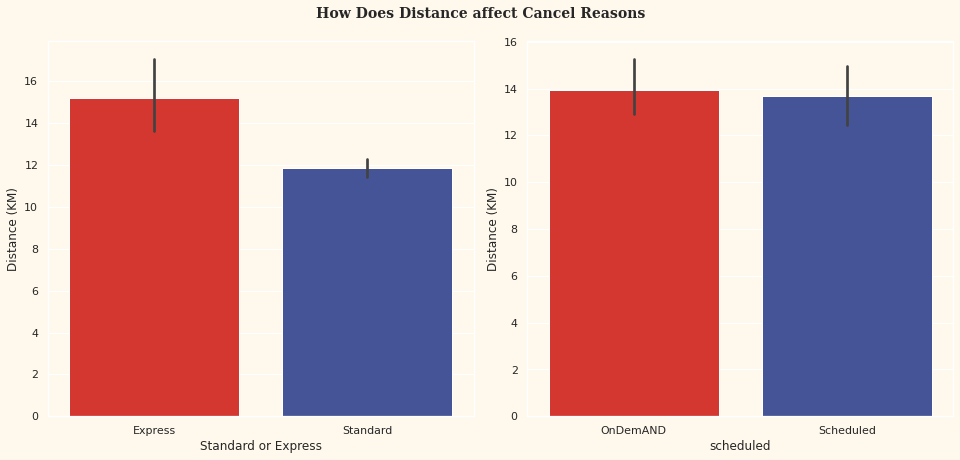

In [116]:
fig, axs = plt.subplots(1, 2)
sns.barplot(
    x='Standard or Express',
    y = 'Distance (KM)',
    data = df,
    palette=colors,
    ax=axs[0]
)
sns.barplot(
    x='scheduled',
    y = 'Distance (KM)',
    data = df,
    palette=colors,
    ax=axs[1]
)
fig = plt.gcf()
fig.set_size_inches(13.5, 6.5)
plt.suptitle('How Does Distance affect Cancel Reasons', fontfamily='serif', fontweight='bold', fontsize=14)
plt.tight_layout()